In [ ]:
هخلى الهماويد عبارة عن ليسته 
واعملها مع فور 

In [33]:
import numpy as np 
import pandas as pd
from sklearn.impute  import SimpleImputer
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [34]:
d=pd.read_csv(r"C:\Users\eyosl\Untitled Folder\processed data of task1.csv")
d

,year,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,2013,6,3.8,79.000000,98.581533,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,2013,4,2.0,94.000000,98.581533,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,2013,6,3.6,94.000000,98.581533,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,2013,6,3.6,94.000000,98.581533,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,2013,4,2.4,82.781834,95.000000,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,2018,4,1.8,82.781834,98.581533,55.2206,78.8197,53.0000,73.6525,54.4329,78,10,10
3925,2018,4,2.0,82.781834,106.000000,39.0000,55.9000,44.3066,64.0000,41.0000,217,9,9
3926,2018,4,2.0,82.781834,106.000000,40.0000,56.0000,46.0000,64.0000,42.0000,212,9,9
3927,2018,6,3.4,99.000000,98.581533,19.2200,24.2000,30.2863,43.4000,23.0021,387,5,5


In [35]:
x=d.drop(['ghgScore'],axis=1)
y=d['ghgScore']

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

x_train


,year,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore
2330,2016,4,2.5,82.781834,105.000000,22.0000,30.0000,31.0000,47.7000,25.0000,354,6
2638,2017,3,1.2,82.781834,90.000000,32.6414,43.7032,39.7448,58.9226,35.4962,249,8
3189,2017,6,3.0,79.000000,98.581533,19.8767,25.1000,28.0626,39.9000,22.8801,389,5
1922,2015,8,5.0,82.781834,102.000000,18.5788,24.7000,23.2848,30.3000,20.4375,432,5
3595,2018,6,3.5,82.781834,104.000000,28.0777,36.8000,33.0331,47.7998,30.1103,296,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1130,2014,3,1.2,82.781834,86.000000,33.1238,44.4503,40.7940,60.7107,36.1855,243,9
1294,2014,4,2.0,88.000000,98.581533,22.9011,29.3140,32.7919,47.4100,26.4976,335,7
860,2014,8,4.2,81.000000,98.581533,15.8793,19.2000,22.1836,28.9000,18.2078,486,4
3507,2018,6,3.0,82.781834,96.000000,17.3650,21.6857,23.7388,33.2484,19.7514,450,4


In [37]:
y_train

2330    6
2638    8
3189    5
1922    5
3595    7
       ..
1130    9
1294    7
860     4
3507    4
3174    3
Name: ghgScore, Length: 3143, dtype: int64

In [38]:
scalar=StandardScaler()
x_train_sc=scalar.fit_transform(x_train)
x_test_sc=scalar.fit_transform(x_test)
x_train_sc

array([[ 0.2825411 , -0.77509451, -0.33724667, ...,  0.02021862,
        -0.23180539,  0.17960821],
       [ 0.87653887, -1.30839618, -1.33094119, ...,  1.76029106,
        -1.37069558,  1.31658428],
       [ 0.87653887,  0.29150884,  0.04494352, ..., -0.33122091,
         0.14782468, -0.38887982],
       ...,
       [-0.90545445,  1.35811218,  0.9622    , ..., -1.10580032,
         1.19994229, -0.95736785],
       [ 1.47053664,  0.29150884,  0.04494352, ..., -0.84990049,
         0.80946565, -0.95736785],
       [ 0.87653887,  1.35811218,  2.64383687, ..., -1.10054506,
         1.19994229, -1.52585588]])

In [72]:
d_reg=LinearRegression()
d_reg.fit(x_train_sc,y_train)
print(d_reg.score(x_test_sc,y_test))

0.9899828065877275


In [60]:
x_train_sc.reshape(-1,1)
x_train_sc.size

37716

In [63]:
y_train.values.reshape(-1,1)
y_train.size

3143

In [64]:
x_train.shape

(3143, 12)

In [65]:
y_train.shape

(3143,)

ValueError: x and y must be the same size

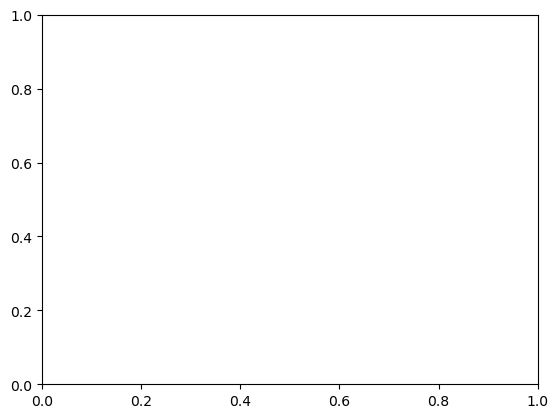

In [57]:
plt.scatter(x_train_sc,y_train)#مش عارفة احل المشكلة دى خالص

ValueError: x and y must be the same size

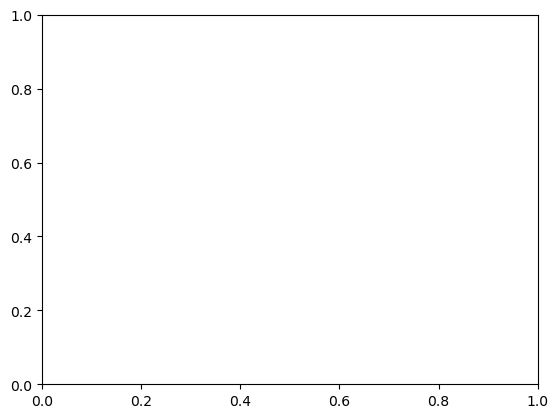

In [73]:
y_pred=d_reg.predict(x_test_sc)
plt.scatter(x_test_sc,y_test,color='r')
plt.plot(x_test_sc,y_pred,color='g')
plt.show()

In [69]:
def msef ( y , yp):
    s=0
    y=y.tolist()
    yp=yp.tolist()
    subtraction =[]
    squares=[]
    
    for i in range(len(y)):
        result =y[i] -yp[i]
        subtraction.append(result)
    for i in  subtraction :    
        output= subtraction[i]**2
        squares.append(output)  
    for i in  squares :
        s=s+squares[i]
    return (s/len(y))    

In [71]:
msef ( y_test , y_pred)

NameError: name 'y_pred' is not defined